# Script to split an image into tiles and convert to halftone

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import halftone

%matplotlib inline

In [2]:
source_dir = 'source'

os.listdir(source_dir)

['N_Tees_Image_crop_0_2',
 '200422photo_haircut01_sm.JPG',
 '.DS_Store',
 'N_Tees_Image_crop_0_3',
 '200422photo_haircut05_sm.jpg',
 'N_Tees_Image_crop_0_1_halftoned.png',
 'N_Tees_Image_halftoned.png',
 'N_Tees_Image.png',
 'N_Tees_Image_crop_0_2_halftoned.png',
 'N_Tees_Image_crop_0_3_halftoned.png',
 'N_Tees_Image_crop_0_1',
 'N_Tees_Image_crop_0_0',
 'N_Tees_Image_crop_0_0_halftoned.png',
 'N_Tees_Image_crop_0_3.png',
 'N_Tees_Image_crop_0_2.png',
 'N_Tees_Image_crop_0_0.png',
 'N_Tees_Image_crop_0_1.png']

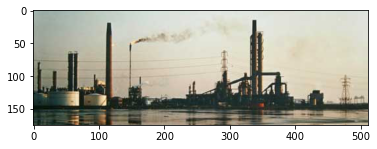

In [3]:
filename = 'N_Tees_Image.png'

im = Image.open(os.path.join(source_dir, filename)) 
plt.imshow(im)

In [4]:
im.size

(512, 175)

In [5]:
dims = (1, 4)
tile_width = im.size[0] / dims[1]
tile_height = im.size[1] / dims[0]
tile_images = [];
index = [];
name, ext = os.path.splitext(filename)
for row in range(dims[0]):
    for col in range(dims[1]):
        index.append((row, col))
        box = (col*tile_width, row*tile_height, (col + 1)*tile_width, (row + 1)*tile_height)
        im_crop = im.crop(box)
        tile_images.append(im_crop)
        scale = 5
        (width, height) = (im_crop.width * scale, im_crop.height * scale)
        im_crop_enlarged = im_crop.resize((width, height))
        crop_filename = f"{name}_crop_{row}_{col}.png";
        im_crop_enlarged.save(os.path.join(source_dir, crop_filename), "PNG")
        h = halftone.Halftone(os.path.join(source_dir, crop_filename))
        h.make(style="grayscale", antialias=True)

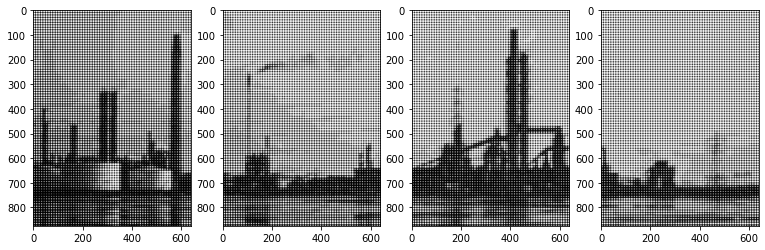

In [6]:
fig, axes = plt.subplots(dims[0], dims[1], figsize=(1+dims[1]*3, 1+dims[0]*3))

for ax, (row, col) in zip(axes, index):
    crop_filename = f"{name}_crop_{row}_{col}_halftoned.png";
    im = Image.open(os.path.join(source_dir, crop_filename))
    ax.imshow(im)